# Instalaciones

In [1]:
pip install gdown

In [2]:
pip install joblib

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

# Descarga Dataset

In [4]:
!gdown --id 1RtP-XbwUrBrSWNeEUqO4-Td46QxXwlzx --output Crash_Analysis_System_CAS_data.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1RtP-XbwUrBrSWNeEUqO4-Td46QxXwlzx
From (redirected): https://drive.google.com/uc?id=1RtP-XbwUrBrSWNeEUqO4-Td46QxXwlzx&confirm=t&uuid=c34057ec-b044-4f46-b490-29d8098058ba
To: /content/Crash_Analysis_System_CAS_data.csv
100% 244M/244M [00:02<00:00, 93.1MB/s]


In [5]:
import pandas as pd
df = pd.read_csv('Crash_Analysis_System_CAS_data.csv')
print(df.head())

           X          Y  OBJECTID  advisorySpeed  areaUnitID  bicycle  bridge  \
0  2037728.0  5709220.0         1            NaN    544500.0      1.0     NaN   
1  1793829.0  5500169.0         2            NaN    564231.0      0.0     NaN   
2  1753976.0  5929363.0         3            NaN    508420.0      0.0     NaN   
3  1771836.0  5914911.0         4            NaN    521602.0      0.0     0.0   
4  1752438.0  5918349.0         5            NaN    515002.0      0.0     NaN   

   bus  carStationWagon  cliffBank  ... train tree truck unknownVehicleType  \
0  0.0              1.0        NaN  ...   NaN  NaN   0.0                0.0   
1  0.0              1.0        NaN  ...   NaN  NaN   0.0                0.0   
2  0.0              2.0        NaN  ...   NaN  NaN   0.0                0.0   
3  0.0              2.0        0.0  ...   0.0  0.0   0.0                0.0   
4  0.0              2.0        NaN  ...   NaN  NaN   0.0                0.0   

   urban vanOrUtility vehicle  waterRi

# Prediccion número de Accidentes

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2}
Mejor R2 en CV: 0.9760140274332411
Test R2: 0.9923535920266252
Test RMSE: 13.172361994618075
Train R2: 0.9919863086098534
Train RMSE: 10.560358635640194


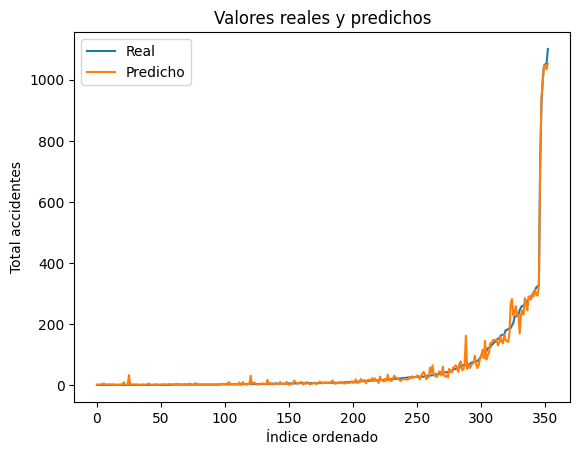

In [6]:
# Cargar y filtrar datos
df = pd.read_csv('Crash_Analysis_System_CAS_data.csv')
df_sample = df.sample(frac=0.1, random_state=42)  # Para acelerar


# Agrupar para total accidentes por año, región y weatherA
agg_total = df_sample.groupby(['crashYear', 'region', 'weatherA']).size().reset_index(name='total_accidents')

# Codificar variables categóricas (región y weatherA)
X = pd.get_dummies(agg_total[['region', 'weatherA']])
X['crashYear'] = agg_total['crashYear']

y = agg_total['total_accidents']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar RandomForestRegressor base
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Grid de hiperparámetros para buscar
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6]
}

# GridSearch con validación cruzada 5-fold, scoring por R2
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R2 en CV:", grid_search.best_score_)

# Entrenar modelo con mejores hiperparámetros
best_rf = grid_search.best_estimator_

# Evaluación en test
y_pred_test = best_rf.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Evaluación en train
y_pred_train = best_rf.predict(X_train)
print("Train R2:", r2_score(y_train, y_pred_train))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

sorted_idx = np.argsort(y_test)
plt.plot(y_test.iloc[sorted_idx].values, label='Real')
plt.plot(y_pred_test[sorted_idx], label='Predicho')
plt.xlabel('Índice ordenado')
plt.ylabel('Total accidentes')
plt.title('Valores reales y predichos')
plt.legend()
plt.show()

# Prediccion de Accidentes por Region

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2}
Mejor R2 en CV: 0.9760140274332411
Test R2: 0.9923535920266252
Test RMSE: 13.172361994618075
Train R2: 0.9919863086098534
Train RMSE: 10.560358635640194


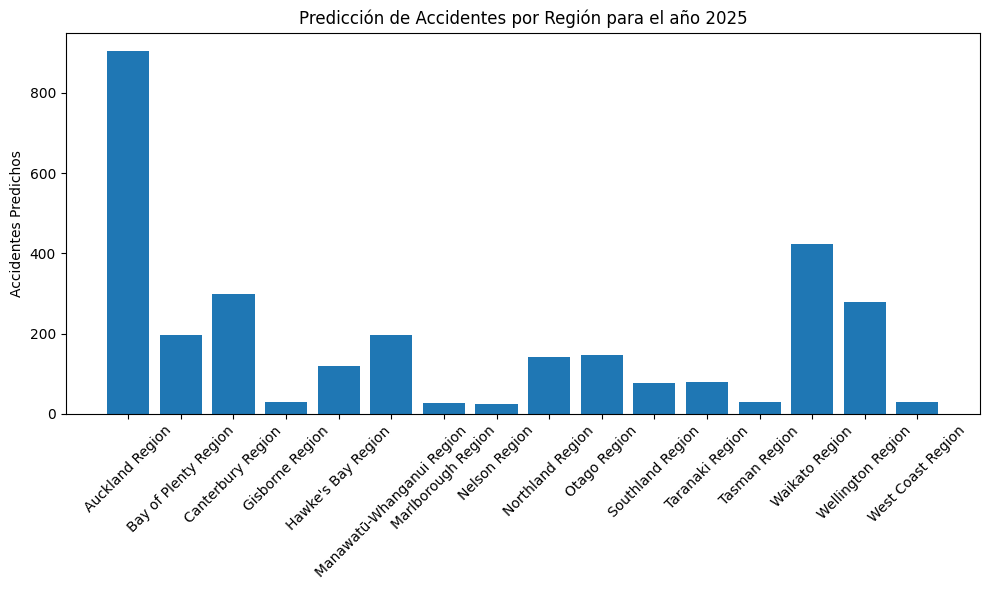

✅ Modelo guardado como 'modelo_accidentes_por_region.pkl'


['columnas_modelo.pkl']

In [7]:
# 1. Cargar y filtrar datos
df = pd.read_csv('Crash_Analysis_System_CAS_data.csv')
df_sample = df.sample(frac=0.1, random_state=42)  # Muestra para acelerar

# 2. Agrupar para obtener total de accidentes por año, región y clima
agg_total = df_sample.groupby(['crashYear', 'region', 'weatherA']).size().reset_index(name='total_accidents')

# 3. Codificar variables categóricas
X = pd.get_dummies(agg_total[['region', 'weatherA']])
X['crashYear'] = agg_total['crashYear']
y = agg_total['total_accidents']

# 4. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Configurar y entrenar RandomForest con búsqueda de hiperparámetros
rf = RandomForestRegressor(n_estimators=100, random_state=42)
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R2 en CV:", grid_search.best_score_)

# 6. Entrenar modelo final
best_rf = grid_search.best_estimator_

# 7. Evaluar el modelo
y_pred_test = best_rf.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

y_pred_train = best_rf.predict(X_train)
print("Train R2:", r2_score(y_train, y_pred_train))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

# 8. Predicción para un año futuro (ej. 2025)
year_to_predict = 2025
unique_regions = df_sample['region'].unique()
unique_weather = df_sample['weatherA'].unique()

# Crear combinaciones de región y clima para el año futuro
future_data = pd.DataFrame([(region, weather, year_to_predict)
                            for region in unique_regions
                            for weather in unique_weather],
                           columns=['region', 'weatherA', 'crashYear'])

# Codificar igual que los datos originales
X_future = pd.get_dummies(future_data)
X_future = X_future.reindex(columns=X.columns, fill_value=0)

# Predecir con el modelo entrenado
future_data['predicted_accidents'] = best_rf.predict(X_future)

# Agrupar por región
predicted_by_region = future_data.groupby('region')['predicted_accidents'].sum().reset_index()

# 9. Visualización
plt.figure(figsize=(10,6))
plt.bar(predicted_by_region['region'], predicted_by_region['predicted_accidents'])
plt.xticks(rotation=45)
plt.ylabel('Accidentes Predichos')
plt.title(f'Predicción de Accidentes por Región para el año {year_to_predict}')
plt.tight_layout()
plt.show()

import joblib

# Guardar el modelo entrenado
joblib.dump(best_rf, 'modelo_accidentes_por_region.pkl')

print("✅ Modelo guardado como 'modelo_accidentes_por_region.pkl'")

# Guardar las columnas usadas en el modelo
joblib.dump(X.columns, 'columnas_modelo.pkl')

# Resultados de Accidentes por Region segun el clima y año

In [8]:
# Cargar el modelo y las columnas
modelo = joblib.load('modelo_accidentes_por_region.pkl')
columnas_modelo = joblib.load('columnas_modelo.pkl')

# Ejemplo de predicción (región "Auckland", clima "Fine", año 2025)
nuevo_df = pd.DataFrame([{
    'region': 'Auckland Region',
    'weatherA': 'Fine',
    'crashYear': 2025
}])

# Codificar igual que antes
X_nuevo = pd.get_dummies(nuevo_df)
X_nuevo = X_nuevo.reindex(columns=columnas_modelo, fill_value=0)

# Predecir
prediccion = modelo.predict(X_nuevo)

print(f"✅ Predicción para Auckland en clima Fine en 2025: {prediccion[0]:.2f} accidentes")

✅ Predicción para Auckland en clima Fine en 2025: 655.96 accidentes
